In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


### 1) satatics labour data

In [3]:
# 1. Load dataset
df = pd.read_csv("employment_cleaned.csv")

In [4]:
print(df.isnull().sum())

class_of_worker               0
april_2025                    0
may_2025                      0
standard_error                0
change_apr_may_2025           0
change_may2024_may2025        0
pct_change_apr_may_2025       0
pct_change_may2024_may2025    0
dtype: int64


In [5]:
numeric_df = df.select_dtypes(include=[np.number]).fillna(0)


In [6]:
# Dummy target 
if 'target' in df.columns:
    y = df['target']
else:
    y = np.random.randint(0, 2, size=df.shape[0])

In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

## Why PCA, t-SNE, and LDA Were Chosen

To analyze and visualize high-dimensional data, we applied three dimensionality reduction techniques:

- **PCA (Principal Component Analysis):** PCA reduces dimensions by finding directions of maximum variance. It helps in summarizing the dataset while retaining most information, making it easier to visualize.

- **t-SNE (t-Distributed Stochastic Neighbor Embedding):** t-SNE captures complex relationships and clusters in data by preserving local similarities, which is valuable for identifying hidden patterns.

- **LDA (Linear Discriminant Analysis):** LDA is a supervised technique that reduces dimensions while focusing on maximizing the separability between classes. It is useful when a target variable is available.



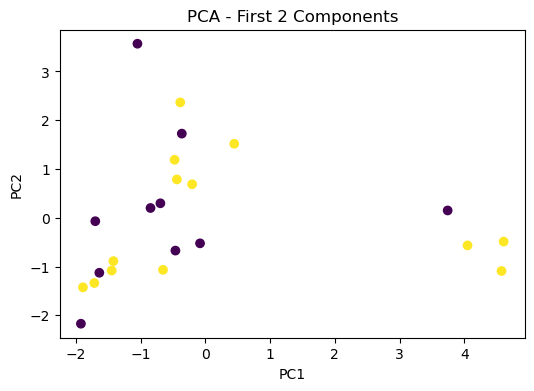

In [8]:
# 3. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA - First 2 Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()




## PCA Results

The PCA projection above reduces the dataset to **two principal components (PC1 and PC2)**.  
- These components represent the axes of maximum variance in the data.  
- The color mapping of the points corresponds to class labels, helping us visualize how the data is distributed in the reduced 2D space.  
- PCA also helps identify the variables that contribute the most to the overall variance.


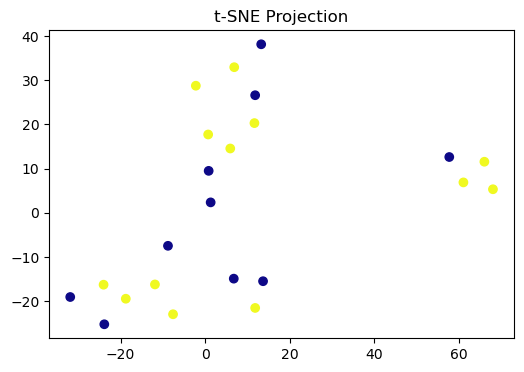

In [9]:
# 4. t-SNE (adjust perplexity automatically)
perplexity_value = min(5, len(numeric_df) - 1)
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(6,4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma')
plt.title("t-SNE Projection")
plt.show()

## t-SNE Results

The **t-SNE projection** provides a non-linear view of the data in 2D space.  
- Unlike PCA, t-SNE focuses on local neighborhoods and cluster structures.  
- Points close to each other in this plot are similar in the high-dimensional space.  
- The colors represent categories or labels, allowing us to observe natural grouping trends.


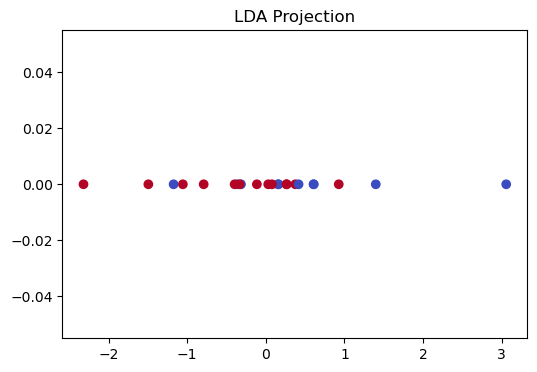

In [10]:
# 5. LDA (if y has >1 class)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)
plt.figure(figsize=(6,4))
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='coolwarm')
plt.title("LDA Projection")
plt.show()

## LDA Results

The **LDA projection** reduces the data while maximizing class separability.  
- LDA finds a linear combination of features that best separates the classes in the dataset.  
- This is particularly useful for supervised tasks where class differences are important.  
- The resulting projection emphasizes boundaries between classes better than PCA or t-SNE.


In [11]:
# 6. SelectKBest for top features
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X_scaled, y)
selected_features = numeric_df.columns[selector.get_support()]
print("Top 5 Features (SelectKBest):", selected_features.tolist())

Top 5 Features (SelectKBest): ['april_2025', 'may_2025', 'standard_error', 'change_may2024_may2025', 'pct_change_apr_may_2025']


In [12]:
# 7. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
feature_importance = pd.DataFrame({
    'Feature': numeric_df.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance:\n", feature_importance.head(10))


Random Forest Feature Importance:
                       Feature  Importance
1                    may_2025    0.177479
0                  april_2025    0.170528
3         change_apr_may_2025    0.159334
5     pct_change_apr_may_2025    0.138253
2              standard_error    0.129634
6  pct_change_may2024_may2025    0.113878
4      change_may2024_may2025    0.110894


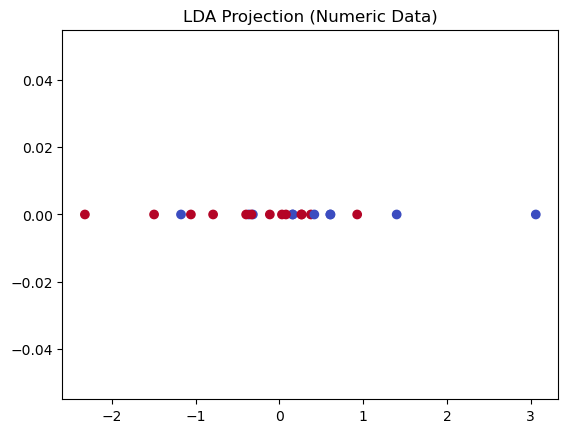

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)  # X_scaled is numeric data, y are class labels

plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='coolwarm')
plt.title("LDA Projection (Numeric Data)")
plt.show()


### 2) Tweeter data 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [ ]:
# Load Twitter data
twitter_df = pd.read_csv("twitter_cleaned.csv")


In [ ]:
# Convert tweets to TF-IDF numeric features
vectorizer = TfidfVectorizer(max_features=500)  # top 500 words
X_tfidf = vectorizer.fit_transform(twitter_df['tweet_text']).toarray()

feature_names = vectorizer.get_feature_names_out()


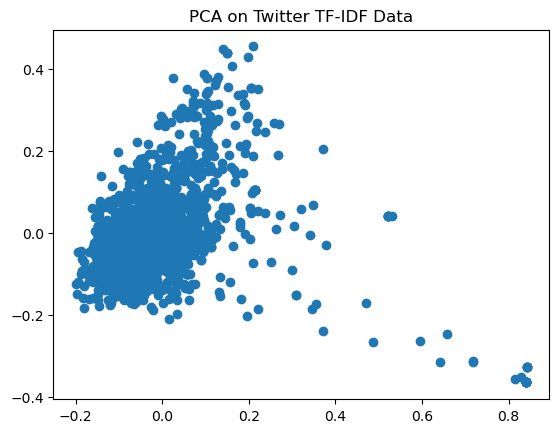

In [ ]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA on Twitter TF-IDF Data")
plt.show()

## PCA on Twitter TF-IDF Data

The plot above shows the results of applying **PCA (Principal Component Analysis)** to the TF-IDF feature matrix derived from Twitter data.  

- **Why PCA here?** The TF-IDF matrix is high-dimensional (one feature per word). PCA reduces this complexity by projecting the data into the top 2 principal components that capture the maximum variance in word usage across tweets.  
- **Insights:** Clusters or patterns in the points may indicate groups of tweets with similar keyword distributions. Outliers represent tweets with distinct vocabulary compared to the majority.


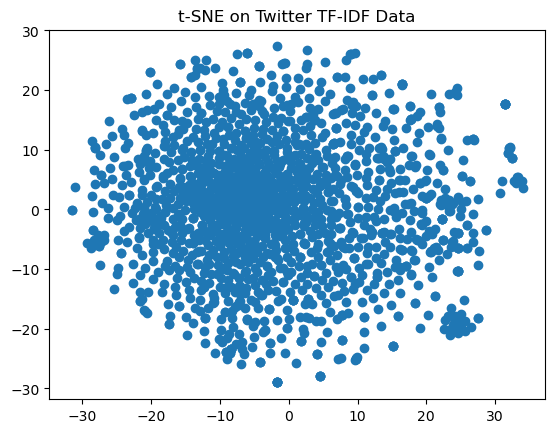

In [ ]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_tfidf)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title("t-SNE on Twitter TF-IDF Data")
plt.show()

## t-SNE on Twitter TF-IDF Data

The plot above shows the 2D projection of Twitter data using **t-SNE (t-Distributed Stochastic Neighbor Embedding)**.  

- **Why t-SNE here?** It is particularly effective at revealing local structures and clusters in high-dimensional datasets like TF-IDF matrices.  
- **Insights:** The dense central region indicates tweets with similar word usage, while points further apart represent tweets with unique vocabulary.  
- Unlike PCA, t-SNE captures non-linear relationships and groups that are not visible in linear projections.


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

text_df = pd.read_csv("twitter_cleaned.csv")

# Convert text to TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X_tfidf = vectorizer.fit_transform(text_df['tweet_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda.fit_transform(X_tfidf)

# Display top words per topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 0:
canadian unemployment inflation canada rising gdp people economy record government
Topic 1:
canadian youth unemployment foreign workers students rate work jobs 15
Topic 2:
canadian unemployment canada trump looking government went carney crisis media
Topic 3:
canada rate unemployment jobs 000 canadian economy june april 2025
Topic 4:
hit rate unemployment canadian youth canada 19 17 covid really


### **Results**
The model identified the following topics with the top words:
- **Topic 0:** canadian, unemployment, inflation, canada, rising, gdp, people, economy, record, government.
- **Topic 1:** canadian, youth, unemployment, foreign, workers, students, rate, work, jobs, 15.
- **Topic 2:** canadian, unemployment, canada, trump, looking, government, went, carney, crisis, media.
- **Topic 3:** canada, rate, unemployment, jobs, 000, canadian, economy, june, april, 2025.
- **Topic 4:** hit, rate, unemployment, canadian, youth, canada, 19, 17, covid, really.

### **Insights**
- **Topic 0** revolves around macroeconomic factors such as GDP, inflation, and government policies.
- **Topic 1** emphasizes youth unemployment, foreign workers, and job opportunities.
- **Topic 4** highlights COVID-19 related impacts on unemployment.

This analysis provides a clear picture of public concerns and dominant themes related to employment trends in Canada.

In [ ]:
y_dummy = np.random.randint(0, 2, size=X_tfidf.shape[0])

In [ ]:
# Train a RandomForestClassifier to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tfidf, y_dummy)

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importance scores

importances = rf.feature_importances_
top_indices = np.argsort(importances)[::-1][:10]  # Top 10 words


In [ ]:
# Get feature importance scores
importances = rf.feature_importances_
top_indices = np.argsort(importances)[::-1][:10]  # Top 10 words

In [ ]:
# Create a dataframe for top words
top_words = pd.DataFrame({
    'Word': feature_names[top_indices],
    'Importance': importances[top_indices]
})
print("Top 10 Important Words:")
print(top_words)


Top 10 Important Words:
           Word  Importance
0  unemployment    0.025812
1      canadian    0.024602
2            to    0.016041
3           and    0.015595
4           the    0.015565
5            is    0.012820
6          rate    0.012196
7            of    0.011417
8            in    0.011295
9        canada    0.010495
